## Finding Keywords from Research Papers for the  Marketing of AI Conference with the help of NLP

In [1]:
#importing all required packages and libraries
import operator
import itertools
import numpy as np
import pandas as pd
import nltk 
import nltk.corpus
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



In [2]:
#importing data set
df = pd.read_csv('C:\\Users\\PankajR\\Downloads\\college_reserach_papers.csv')
#displaying first 5 rows of dataframe
df.head()

,title,authors,groups,keywords,topics,abstract
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co..."


In [3]:
#As abstract and other columns  are too descriptive and not making much sence for analysis so dropping that column and considering rest
ndf = df[['title','groups','keywords','topics']]


In [4]:
#saving new dataframe as csv file
ndf.to_csv('new.csv')

In [5]:
type(ndf.groups)

pandas.core.series.Series

### Data Cleaning

In [6]:
#removing "\n" and "/" from all data
ndf = ndf.replace(r'\n',' ', regex=True) 
ndf = ndf.replace(r' /',' ', regex=True) 
ndf = ndf.replace(r', ,,',' ', regex=True) 



In [7]:
#cleaned dataframe
ndf

,title,groups,keywords,topics
0,Kernelized Bayesian Transfer Learning,Novel Machine Learning Algorithms (NMLA),cross-domain learning domain adaptation kernel...,APP: Biomedical Bioinformatics NMLA: Bayesian...
1,"""Source Free"" Transfer Learning for Text Class...",AI and the Web (AIW) Novel Machine Learning Al...,Transfer Learning Auxiliary Data Retrieval Tex...,AIW: Knowledge acquisition from the web AIW: M...
2,A Generalization of Probabilistic Serial to Ra...,Game Theory and Economic Paradigms (GTEP),social choice theory voting fair division soci...,GTEP: Game Theory GTEP: Social Choice Voting
3,Lifetime Lexical Variation in Social Media,NLP and Text Mining (NLPTM),Generative model Social Networks Age Prediction,AIW: Web personalization and user modeling NLP...
4,Hybrid Singular Value Thresholding for Tensor ...,Knowledge Representation and Reasoning (KRR) M...,tensor completion low-rank recovery hybrid sin...,KRR: Knowledge Representation (General/Other) ...
...,...,...,...,...
393,Mapping Users Across Networks by Manifold Alig...,AI and the Web (AIW),Social Networks Manifold Alignment Hypergraph ...,AIW: Machine learning and the web AIW: Ontolog...
394,Compact Aspect Embedding For Diversified Query...,AI and the Web (AIW),query expansion search result diversification ...,AIW: Enhancing web search and information retr...
395,Contraction and Revision over DL-Lite TBoxes,Knowledge Representation and Reasoning (KRR),Belief Change Description Logic Non-monotonic ...,KRR: Belief Change KRR: Description Logics KRR...
396,Zero Pronoun Resolution as Ranking,NLP and Text Mining (NLPTM),Zero Pronouns Text Mining Natural Language Pro...,NLPTM: Evaluation and Analysis


### word_tokenize

In [8]:
#tokenizing all columns (word_tokenize)

ndf['title'] = ndf['title'].map(lambda x:word_tokenize(x))

ndf['keywords'] = ndf['keywords'].map(lambda x:word_tokenize(x))

ndf['topics'] = ndf['topics'].map(lambda x:word_tokenize(str(x)))
ndf['groups'] = ndf['groups'].map(lambda x:word_tokenize(str(x)))

In [9]:
ndf.head()

,title,groups,keywords,topics
0,"[Kernelized, Bayesian, Transfer, Learning]","[Novel, Machine, Learning, Algorithms, (, NMLA...","[cross-domain, learning, domain, adaptation, k...","[APP, :, Biomedical, Bioinformatics, NMLA, :, ..."
1,"[``, Source, Free, '', Transfer, Learning, for...","[AI, and, the, Web, (, AIW, ), Novel, Machine,...","[Transfer, Learning, Auxiliary, Data, Retrieva...","[AIW, :, Knowledge, acquisition, from, the, we..."
2,"[A, Generalization, of, Probabilistic, Serial,...","[Game, Theory, and, Economic, Paradigms, (, GT...","[social, choice, theory, voting, fair, divisio...","[GTEP, :, Game, Theory, GTEP, :, Social, Choic..."
3,"[Lifetime, Lexical, Variation, in, Social, Media]","[NLP, and, Text, Mining, (, NLPTM, )]","[Generative, model, Social, Networks, Age, Pre...","[AIW, :, Web, personalization, and, user, mode..."
4,"[Hybrid, Singular, Value, Thresholding, for, T...","[Knowledge, Representation, and, Reasoning, (,...","[tensor, completion, low-rank, recovery, hybri...","[KRR, :, Knowledge, Representation, (, General..."


### Stopwords_Removal

In [10]:
stop_words = set(stopwords.words('english')) 

In [11]:
#removing stopwords from all the columns 
sw = set(stopwords.words('english'))
ndf['title'] = ndf['title'].map(lambda x:[w for w in x if w not in sw])
ndf['groups'] = ndf['groups'].map(lambda x:[w for w in x if w not in sw])
ndf['keywords'] = ndf['keywords'].map(lambda x:[w for w in x if w not in sw])
ndf['topics'] = ndf['topics'].map(lambda x:[w for w in x if w not in sw])

In [12]:
ndf.head()

,title,groups,keywords,topics
0,"[Kernelized, Bayesian, Transfer, Learning]","[Novel, Machine, Learning, Algorithms, (, NMLA...","[cross-domain, learning, domain, adaptation, k...","[APP, :, Biomedical, Bioinformatics, NMLA, :, ..."
1,"[``, Source, Free, '', Transfer, Learning, Tex...","[AI, Web, (, AIW, ), Novel, Machine, Learning,...","[Transfer, Learning, Auxiliary, Data, Retrieva...","[AIW, :, Knowledge, acquisition, web, AIW, :, ..."
2,"[A, Generalization, Probabilistic, Serial, Ran...","[Game, Theory, Economic, Paradigms, (, GTEP, )]","[social, choice, theory, voting, fair, divisio...","[GTEP, :, Game, Theory, GTEP, :, Social, Choic..."
3,"[Lifetime, Lexical, Variation, Social, Media]","[NLP, Text, Mining, (, NLPTM, )]","[Generative, model, Social, Networks, Age, Pre...","[AIW, :, Web, personalization, user, modeling,..."
4,"[Hybrid, Singular, Value, Thresholding, Tensor...","[Knowledge, Representation, Reasoning, (, KRR,...","[tensor, completion, low-rank, recovery, hybri...","[KRR, :, Knowledge, Representation, (, General..."


### Lemmatization

In [13]:
# Applying lemmatization in order to cut prefix and suffix and comparing with dictionary to get exact root words 
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
ndf['title'] = ndf['title'].map(lambda x:[lem.lemmatize(word) for word in x])
ndf['groups'] = ndf['groups'].map(lambda x:[lem.lemmatize(word) for word in x])
ndf['keywords'] = ndf['keywords'].map(lambda x:[lem.lemmatize(word) for word in x])
ndf['topics'] = ndf['topics'].map(lambda x:[lem.lemmatize(word) for word in x])

In [14]:
ndf.head()

,title,groups,keywords,topics
0,"[Kernelized, Bayesian, Transfer, Learning]","[Novel, Machine, Learning, Algorithms, (, NMLA...","[cross-domain, learning, domain, adaptation, k...","[APP, :, Biomedical, Bioinformatics, NMLA, :, ..."
1,"[``, Source, Free, '', Transfer, Learning, Tex...","[AI, Web, (, AIW, ), Novel, Machine, Learning,...","[Transfer, Learning, Auxiliary, Data, Retrieva...","[AIW, :, Knowledge, acquisition, web, AIW, :, ..."
2,"[A, Generalization, Probabilistic, Serial, Ran...","[Game, Theory, Economic, Paradigms, (, GTEP, )]","[social, choice, theory, voting, fair, divisio...","[GTEP, :, Game, Theory, GTEP, :, Social, Choic..."
3,"[Lifetime, Lexical, Variation, Social, Media]","[NLP, Text, Mining, (, NLPTM, )]","[Generative, model, Social, Networks, Age, Pre...","[AIW, :, Web, personalization, user, modeling,..."
4,"[Hybrid, Singular, Value, Thresholding, Tensor...","[Knowledge, Representation, Reasoning, (, KRR,...","[tensor, completion, low-rank, recovery, hybri...","[KRR, :, Knowledge, Representation, (, General..."


### Tf-Idf vectorizor

In [15]:
#applying tf-idf vectorisor in order to convert text into number (making of number matrix)
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',max_features = 20000)

In [16]:
tf_idf_vectorizor


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=20000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [17]:
tf_idf = tf_idf_vectorizor.fit_transform(ndf)

In [18]:
ndf['title']=ndf['title'].apply(lambda x :(str(x).lower()))
ndf['groups']=ndf['groups'].apply(lambda x :(str(x).lower()))
ndf['keywords']=ndf['keywords'].apply(lambda x :(str(x).lower()))
ndf['topics']=ndf['topics'].apply(lambda x :(str(x).lower()))


In [19]:
tfidf = TfidfVectorizer(min_df = 5,
    max_df = 0.7,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(ndf["title"]+ndf["groups"]+ndf["topics"]+ndf["keywords"])
text = tfidf.transform(ndf["title"]+ndf["groups"]+ndf["topics"]+ndf["keywords"])
text

<398x342 sparse matrix of type '<class 'numpy.float64'>'
	with 6385 stored elements in Compressed Sparse Row format>

# K-Means Clustering

### Elbow method for optimal K- value

In [20]:
#Finding optimum K value 
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(text)
    Sum_of_squared_distances.append(km.inertia_)

In [21]:
km.inertia_

251.0525369399863

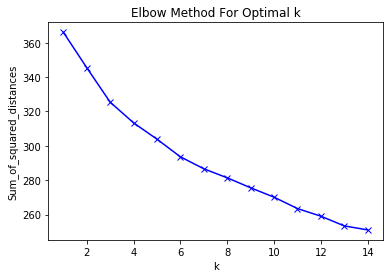

In [22]:
#plotting elbow graph to get optimum K value for clusters
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Hence we selected 9 clusters from elbow method

In [23]:
#Applying K-means clustering
clusters = KMeans(n_clusters=9, max_iter=100).fit_predict(text)
#AgglomerativeClustering(n_cluster=k_cluster,linkage="ward")
#SpectralClustering(n_cluster=k_clusters,affinity="precomputed,n_init=200")
#AffinityPropagation(damping=0.6)

# PCA & tSNE

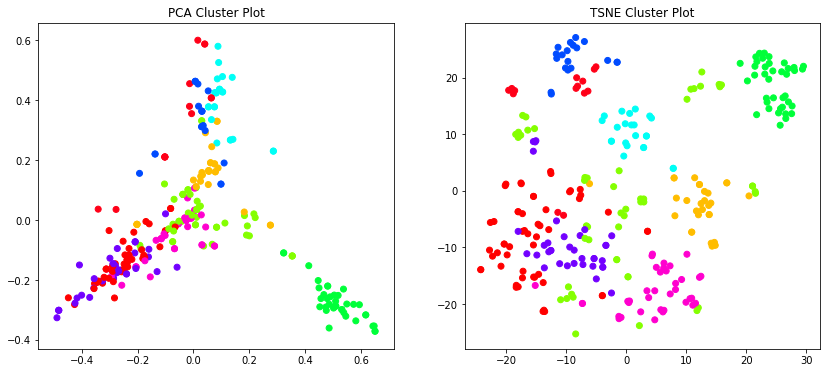

In [24]:
#function to apply principle component analysis 
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=400, replace=True)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)
    

In [25]:
#silhouette_score (-1: worst ) (1: best) (0: clusters are overlapping)
import sklearn
from sklearn.metrics import silhouette_score
sklearn.metrics.silhouette_score(text, clusters, metric='euclidean', sample_size=None, random_state=None)

0.10029970383421852

#### Final clusters & keywords which are most important and relevant 

In [26]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 20)


Cluster 0
sparse,kernel,label,reinforcement,supervised,adaptation,multi,dimension,bayesian,reduction,transfer,ru,selection,classification,feature,algorithms,novel,machine,nmla,learning

Cluster 1
spatial,languages,based,general,programming,ru,action,qualitative,diagnosis,ontologies,change,causality,logics,complexity,logic,description,representation,knowledge,reasoning,krr

Cluster 2
rob,spatiotemporal,computational,cognitive,language,humans,vision,cs,ai,learning,modeling,mas,human,recognition,cm,dynamic,app,hai,vis,csai

Cluster 3
games,information,imperfect,auctions,computational,design,market,mechanism,multiagent,systems,equilibrium,voting,paradigms,economic,mas,social,choice,theory,game,gtep

Cluster 4
environments,sequential,search,making,markov,robotics,optimization,rob,temporal,deterministic,krr,decision,probabilistic,reasoning,general,uncertainty,ru,scheduling,ps,planning

Cluster 5
learning,problem,hso,mas,algorithm,tools,general,solvers,distributed,counting,global,optimizatio

# Keywords for SEO